# Homework 5: Linear Regression

**Insert HW logistics**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set_style("darkgrid")

## Question 1: Correlation

**Part (a)**: For each of the following, indicate if the correlation between the two features would most likely be closest to 0.8, 0.2, 0, -0.2, or -0.8.

- Average hours worked per week, and weekly income.
- Number of cookies eaten per week, and Body Mass Index (BMI).
- Temperate and month of the year.
- Temperate and ice cream sales.

Answer: 
- Closer to 0.8
- Closer to 0.2
- Closer to 0 (because there is nonlinear relationship but not linear relationship)
- Closer to -0.8

**Part (b)**: Give one example of two features that are correlated but not causally related. Clearly justify why there is a correlation, and show that the relationship is not causal by identifying a confounder, i.e. a third feature that is causally responsible for the correlation between the two features.

Answer: 
- One example is a country's chocolate consumption and a country's number of Nobel laureates. These variables have a strong correlation (e.g. see [this paper](https://academic.oup.com/jn/article/143/6/931/4571741)), and yet there is no causal relationship. Instead, there is some confounding variable that leads to this correlation (e.g., wealth).

## Question 2: Accord Data Correlation

The below code will read in data about the prices of various used cars along with their make, model, trim, year, and mileage. 

In [2]:
cars_df = pd.read_csv("https://raw.githubusercontent.com/stanford-mse-125/homework/main/data/used_cars.csv")
cars_df

,type,year,make,model,trim,mileage,price
0,USED,2010,Acura,TL,Base,73936,19388
1,USED,2012,Acura,MDX,Technology Package,32453,34898
2,USED,2010,Acura,TL,Base,34302,22000
3,USED,2009,Acura,TL,SH-AWD,98772,17988
4,USED,2007,Acura,MDX,Base,65677,22777
...,...,...,...,...,...,...,...
1281,USED,2013,Volkswagen,Jetta,SE PZEV,39233,14599
1282,USED,2013,Volkswagen,Jetta,SE PZEV,35939,13599
1283,USED,2013,Volkswagen,Jetta,SE PZEV,31768,14200
1284,USED,2012,Volkswagen,Jetta,S,65985,13495


**Part (a)**: Let's look at only the data for Honda Accords. Make a scatter plot which shows the relationship between the value of an Accord and the mileage, with mileage on the x-axis and value on the y-axis.

<Axes: xlabel='mileage', ylabel='price'>

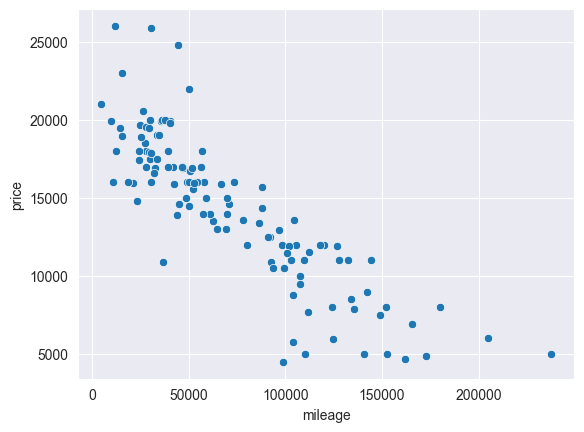

In [3]:
# ---------------- Question 1 (b) -------------- #

accord_df = cars_df[cars_df["model"] == "Accord"]
sns.scatterplot(data=accord_df, x="mileage", y="price")

# ---------------------------------------------- #

**Part (b)**: Your plot from part (a) should reveal a pretty strong negative correlation between mileage and price in Honda Accords. But how strong is this correlation? Generate a point estimate as well as a 95% confidence interval for the correlation between mileage and price in Honda Accords, and interpret the resulting confidence interval. You may use any procedure we've learned for generating the confidence interval.

In [5]:
# Set seed
np.random.seed(10)

# -------  Write code below ---------- #

corr = accord_df[["mileage", "price"]].corr().iloc[0, 1]
print(f"Point estimate for correlation: {np.round(corr, 4)}")

n_trials = 1000
n = accord_df.shape[0]
corrs = np.zeros(n_trials)
for i in range(n_trials):
    sample = accord_df.sample(n=n, replace=True)
    corrs[i] = sample[["mileage", "price"]].corr().iloc[0, 1]


# Using the Percentile method
print(f"Percentile CI: ({np.round(np.percentile(corrs, 2.5), 4)}, {np.round(np.percentile(corrs, 97.5), 4)})")

# Using the normal approximation method
boot_mean = corrs.mean()
boot_std = corrs.std()
print(f"Normal Approximation CI: {(np.round(boot_mean - 1.96*boot_std, 4), np.round(boot_mean + 1.96*boot_std, 4))}")

Point estimate for correlation: -0.8626
Percentile CI: (-0.9019, -0.8221)
Normal Approximation CI: (-0.9048, -0.8254)


## Question 3: Accord Data Regression

**Part (a)**: Use `statsmodels` to fit a linear regression model predicting the price of an Accord from the mileage of the car (plus an intercept term). Print out a summary of the model. 

In [27]:
# ------------- Question 2 (a) ----------------- #

X = sm.add_constant(accord_df[["mileage"]])
y = accord_df["price"]
lm = sm.OLS(y, X).fit()
print(lm.summary())

# -------------------------------------------- #

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     348.9
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           2.58e-37
Time:                        11:27:52   Log-Likelihood:                -1122.7
No. Observations:                 122   AIC:                             2249.
Df Residuals:                     120   BIC:                             2255.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.068e+04    399.474     51.757      0.0

**Part (b)**: What are the coefficients from the fitted model? Write the fitted regression equation, and interpret these coefficients in the context of the problem. 

Answer to Question 2 (b): The coefficients are $\hat{\beta}_0 = 20,680$ and $\hat{\beta}_1 = -0.0878$, giving a fitted regression equation of 

<center>
Predicted Price = 20680 - 0.0878 mileage.
</center>

Here the estimate for $\hat{\beta}_1$ means that for each additional mile an Accord is driven, we estimate that its value will decrease by about 9 cents. The estimate for $\hat{\beta}_0$ means that a brand new Accord (0 mileage) is estimated to be \$20,680. 

**Part (c)**: Recreate the scatter plot from Part (b), but now also with the fitted regression line. Does the regression line appear to fit the data well? Use appropriate information from the summary output to support your conclusion.

<AxesSubplot:xlabel='mileage', ylabel='price'>

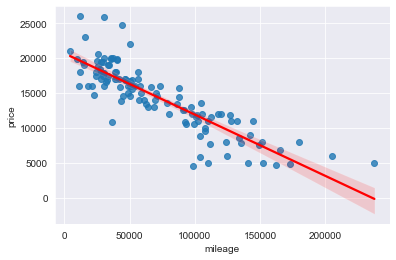

In [10]:
# ------------- Question 2 (c) ----------------- #

sns.regplot(data=accord_df, x="mileage", y="price", line_kws={"color": "red"})

# ---------------------------------------------- #

This regression does appear to fit the data well. This is supported by the fact that the model $R^2$ is 0.744, meaning the regression line captures a significant portion of the variance of the data.

**Part (d)** Now you want to get an estimate for how much money your Accord is worth. Suppose your Accord has been driven for 50,000 miles. Use the fitted model to predict how much your car is worth. Round your prediction to the nearest dollar using `np.round`. 

In [15]:
# ------------- Question 2 (c) ----------------- #

pred = lm.predict(np.array([[1, 50000]]))[0]
np.round(pred)

# ---------------------------------------------- #

16285.0